In [32]:
# Write dependencies here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import argparse
import re
import glob
import subprocess

The dataset contains various columns related to the loyalty program, such as member information, points earned, points balance, and rewards claimed. Here's a brief overview of the columns:

1. Member Id: Unique identifier for each member.
2. Name: Member's name.
3. Email: Member's email address.
4. Birth month, Birth year, Birth day: Member's date of birth details.
5. Phone: Member's phone number.
6. Store Staff: The staff member associated with the member.
7. Member Since: The date when the member joined the loyalty program.
8. Sign up at: Where the member signed up.
9. Number of Visit: Total number of visits.
10. Last Visit: Date of the last visit.
11. Member Tier: Membership tier (e.g., Basic, Premium).
12. Points Earned: Total points earned over the lifetime of the membership.
13. Points Balance: Points balance after the event ended.
14. Total Spending: Total spending by the member.
15. Claimed Rewards: Rewards claimed by the member.
16. Category: Category of the member (e.g., New, Loyal).

To generate data-driven insights for the special anniversary event, I will analyze the data focusing on the points earned, points balance, total spending, and claimed rewards during the event period. This analysis will help to understand member engagement, spending patterns, and the overall impact of the event on the loyalty program.

Let's start the analysis by examining key statistics and distributions of the relevant columns. We will look at the distribution of points earned, points balance, total spending, and claimed rewards, as well as the relationship between these variables. Additionally, we'll explore the member tier and category distributions to understand the composition of the members who participated in the event.

In [33]:
# Assuming 'data.csv' is your dataset file
data = pd.read_csv('/workspaces/streamline-insights/data/Eber-insights-cig-cleaned.csv')

# Displaying basic statistics for numerical columns
print(data[['Points Earned', 'Points Balance', 'Total Spending', 'Claimed Rewards']].describe())

# Counting values for Member Tier and Category columns
print("\nMember Tier Counts:")
print(data['Member Tier'].value_counts())

print("\nCategory Counts:")
print(data['Category'].value_counts())


       Points Earned  Points Balance  Total Spending  Claimed Rewards
count     514.000000      514.000000      514.000000       514.000000
mean        8.926070        2.700389        1.544747         0.622568
std        12.264721        7.577007        8.345076         0.875014
min         0.000000        0.000000        0.000000         0.000000
25%         0.000000        0.000000        0.000000         0.000000
50%         7.000000        0.000000        0.000000         0.000000
75%        11.000000        3.000000        0.000000         1.000000
max       110.000000       94.000000      101.000000         4.000000

Member Tier Counts:
Member Tier
Basic    514
Name: count, dtype: int64

Category Counts:
Category
Loyal         254
New           179
Frequent       45
Infrequent     36
Name: count, dtype: int64


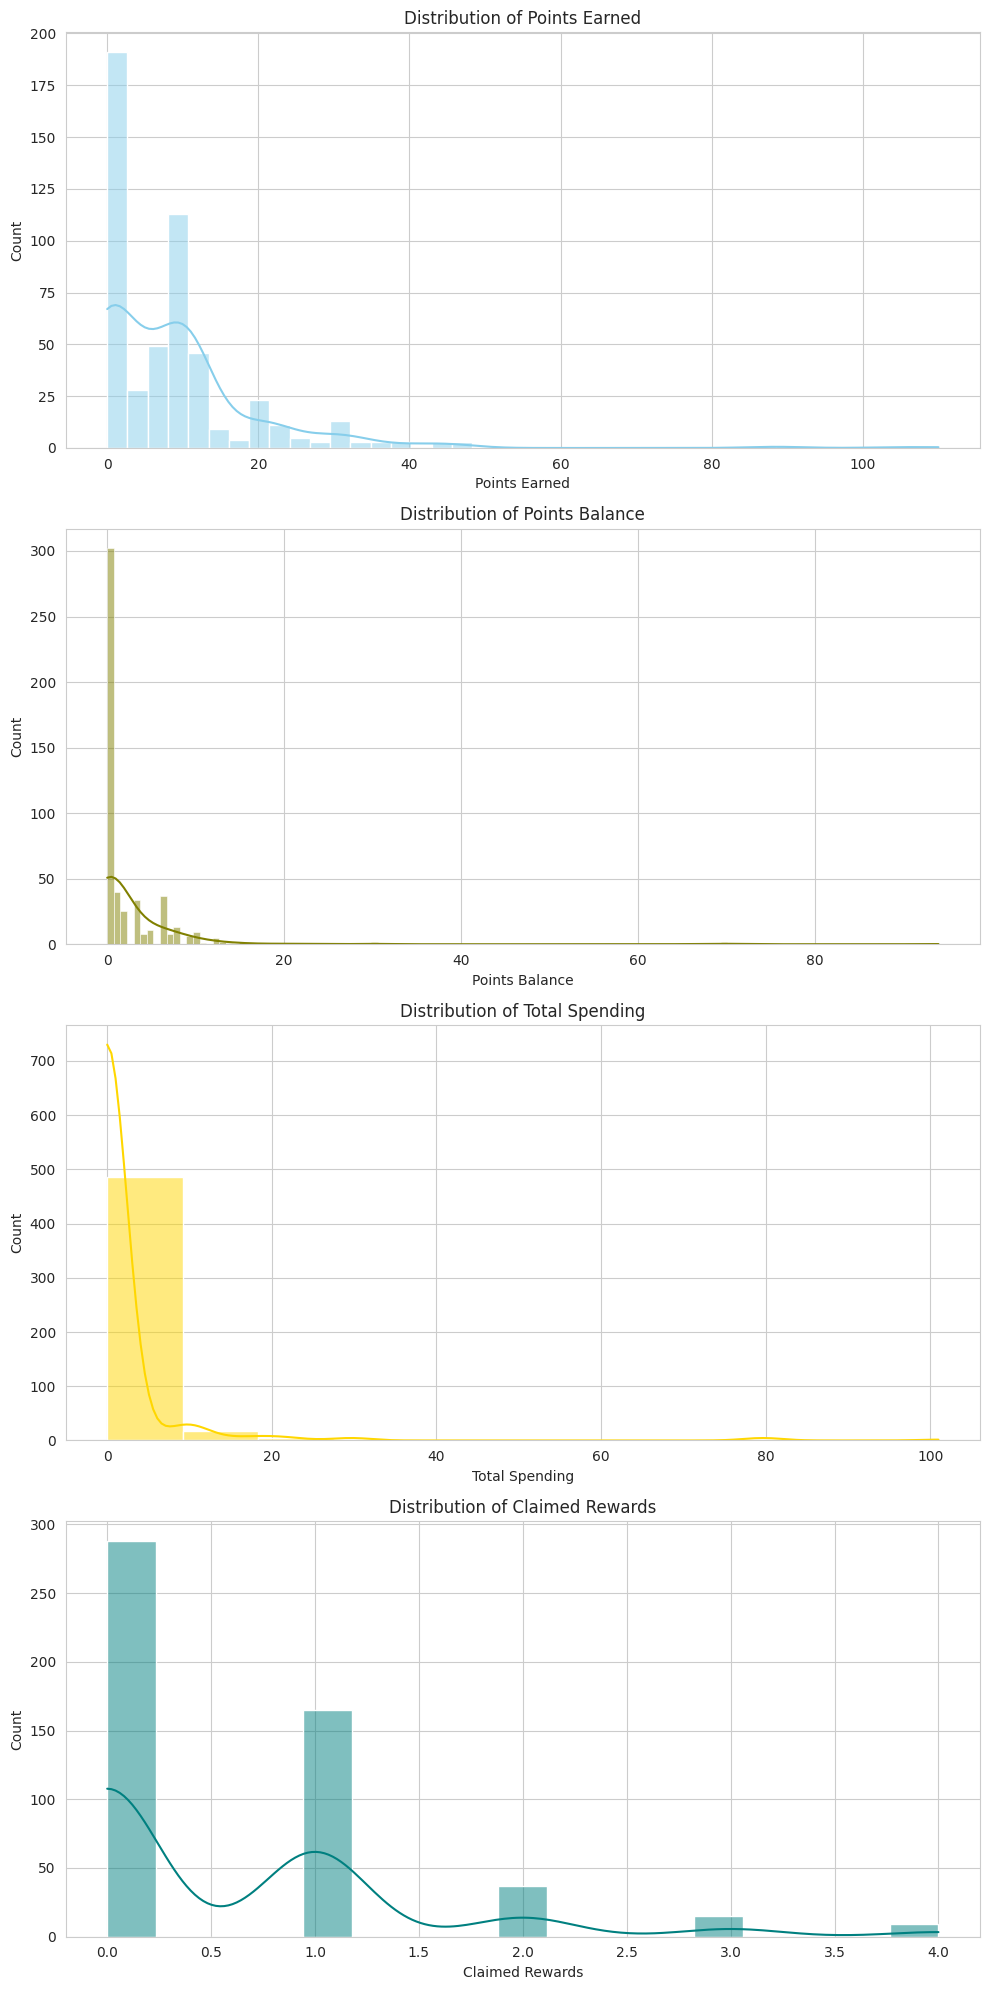

In [30]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a figure and a grid of subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

# Plotting 'Points Earned'
sns.histplot(data['Points Earned'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Points Earned')

# Plotting 'Points Balance'
sns.histplot(data['Points Balance'], kde=True, color='olive', ax=axes[1])
axes[1].set_title('Distribution of Points Balance')

# Plotting 'Total Spending'
sns.histplot(data['Total Spending'], kde=True, color='gold', ax=axes[2])
axes[2].set_title('Distribution of Total Spending')

# Plotting 'Claimed Rewards'
sns.histplot(data['Claimed Rewards'], kde=True, color='teal', ax=axes[3])
axes[3].set_title('Distribution of Claimed Rewards')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


# Distribution Analysis

The analysis of the loyalty program data reveals several key insights:

## Basic Statistics
- **Points Earned**: On average, members earned about 8.93 points with a standard deviation of 12.26. The maximum points earned by a member are 110.
- **Points Balance**: The average points balance after the event is approximately 2.70, with a standard deviation of 7.58. The maximum points balance is 94.
- **Total Spending**: Members spent an average of 1.54 MYR, with significant variation (std. dev. of 8.35). The maximum spending recorded is 101 MYR.
- **Claimed Rewards**: On average, members claimed about 0.62 rewards. The maximum number of rewards claimed is 4.

## Distributions
- The distributions of points earned, points balance, total spending, and claimed rewards are skewed to the right. This indicates that a majority of members have lower values for these variables, but there are a few members with very high values.
- It is notable that there are peaks at 0 for each of these distributions, suggesting a significant number of members did not earn points, have a points balance, spend money, or claim rewards.

## Member Composition
- All members are in the Basic tier. This indicates a uniformity in the membership tier among the participants.
- In terms of the member category, the distribution is as follows:
    - Loyal: 254 members
    - New: 179 members
    - Frequent: 45 members
    - Infrequent: 36 members

## Insights and Recommendations
1. **Member Engagement**: A large number of members have not engaged significantly (as indicated by zeros in points earned, balance, spending, and rewards). Strategies to increase engagement among these members should be considered.
2. **Spending Patterns**: The low average total spending suggests that either the members are not spending much or the event did not significantly influence their spending habits. Tailored promotions or targeted communications could be used to encourage higher spending.
3. **Reward Claiming Behavior**: To be discussed in the next section.
4. **Focus on Loyal and New Members**: The majority of participants are either loyal or new. Tailored strategies for these two groups could be effective. For example, offering exclusive rewards for loyal members to maintain their interest, and introductory offers to convert new members into frequent visitors.
For this analysis, let's choose Predicting Member Spending as our business case. We'll identify features that can potentially predict how much a member will spend in the future.

## Feature Engineering and Selection
1. **Feature Engineering**: We can create new features that might be predictive of spending, such as:

- Age of the member (derived from birth date).
- Membership duration (time since the member joined).
- Average points earned per visit.
- Reward claiming rate (claimed rewards/points earned).

2. **Feature Selection**: We will select features that are likely to influence spending, such as:

- Member Tier
- Number of Visits
- Last Visit (possibly converted to a measure of recency)
- Points Earned
- Points Balance
- Claimed Rewards
- Newly engineered features

Let's start by engineering these new features and then selecting the most relevant ones for our analysis.

The feature engineering process resulted in the addition of several new features, which could be predictive of member spending. Let's review them along with some insights from their statistics:

## Engineered Features
1. **Age**: Ranges from 1 to 73 years, with an average age of about 26 years. This might indicate a relatively young customer base.
2. **Membership Duration**: Ranges from 12 to 16 days, suggesting that the data is quite recent or covers a short period post-membership.
3. **Average Points per Visit**: Calculated as points earned per number of visits. However, there are members with zero visits, leading to infinite values in some cases.
4. **Reward Claim Rate**: The rate at which rewards are claimed based on points earned. It ranges from 0 to 0.1, indicating a low overall rate of reward claiming.

## Selected Features for Analysis
- **Member Tier**: All members are in the Basic tier.
- **Number of Visit**: Most members have 0 visits, with a maximum of 2 visits.
- **Points Earned, Balance, and Claimed Rewards**: These features are skewed, with many members having low values.
- **Total Spending**: This is our target variable for predicting future spending.

## Insights
- The low number of visits and reward claim rate indicate a need for strategies to increase engagement.
- The average age suggests targeting strategies should be tailored towards a younger demographic.
- The short membership duration indicates a potential focus on initial engagement post-membership.

## Next Steps
1. Data Cleaning: Address infinite values in 'Avg Points per Visit' and potentially transform features to better fit predictive models (e.g., log transformation for skewed features).
2. Correlation Analysis: Examine correlations between these features and total spending to identify the most predictive features.
3. Model Building: Use a regression model to predict total spending based on selected features.

# Data Cleaning

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# Converting 'Member Since' and 'Last Visit' to datetime
data['Member Since'] = pd.to_datetime(data['Member Since'])
data['Last Visit'] = pd.to_datetime(data['Last Visit'])
data['Number of Visit'] = data['Number of Visit'] + 1 # Handling division by zero by initialising zeros to 1

# Current date for the analysis
current_date = datetime.now()

# Feature Engineering
data['Age'] = current_date.year - data['Birth year']
data['Membership Duration'] = (current_date - data['Member Since']).dt.days
data['Avg Points per Visit'] = data['Points Earned'] / data['Number of Visit']
data.loc[:,'Avg Points per Visit'] = data['Avg Points per Visit'].fillna(0) # Handling division by zero
data['Avg Points per Visit'] = data['Avg Points per Visit'].replace([float('inf'), -float('inf')], 0)

# Adjusting Reward Claim Rate
data['Reward Claim Rate'] = data['Claimed Rewards'] * 10 / data['Points Earned']
data.loc[:, 'Reward Claim Rate'] = data['Reward Claim Rate'].fillna(0)
data['Reward Claim Rate'] = data['Reward Claim Rate'].replace([float('inf'), -float('inf')], 0)

# Preparing the dataset for modeling
selected_features = data[['Number of Visit', 'Last Visit', 'Points Earned', 
                          'Points Balance', 'Claimed Rewards', 'Age', 
                          'Membership Duration', 'Avg Points per Visit', 
                          'Reward Claim Rate', 'Total Spending']]

# Handling datetime feature ('Last Visit')
selected_features['Last Visit'] = (current_date - selected_features['Last Visit']).dt.days

# Check for missing values
missing_values = selected_features.isnull().sum()
print("Checking for missing values:")
print(missing_values)

Checking for missing values:
Number of Visit         0
Last Visit              0
Points Earned           0
Points Balance          0
Claimed Rewards         0
Age                     0
Membership Duration     0
Avg Points per Visit    0
Reward Claim Rate       0
Total Spending          0
dtype: int64


/tmp/ipykernel_7583/2058494690.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['Last Visit'] = (current_date - selected_features['Last Visit']).dt.days


# Correlation Analysis

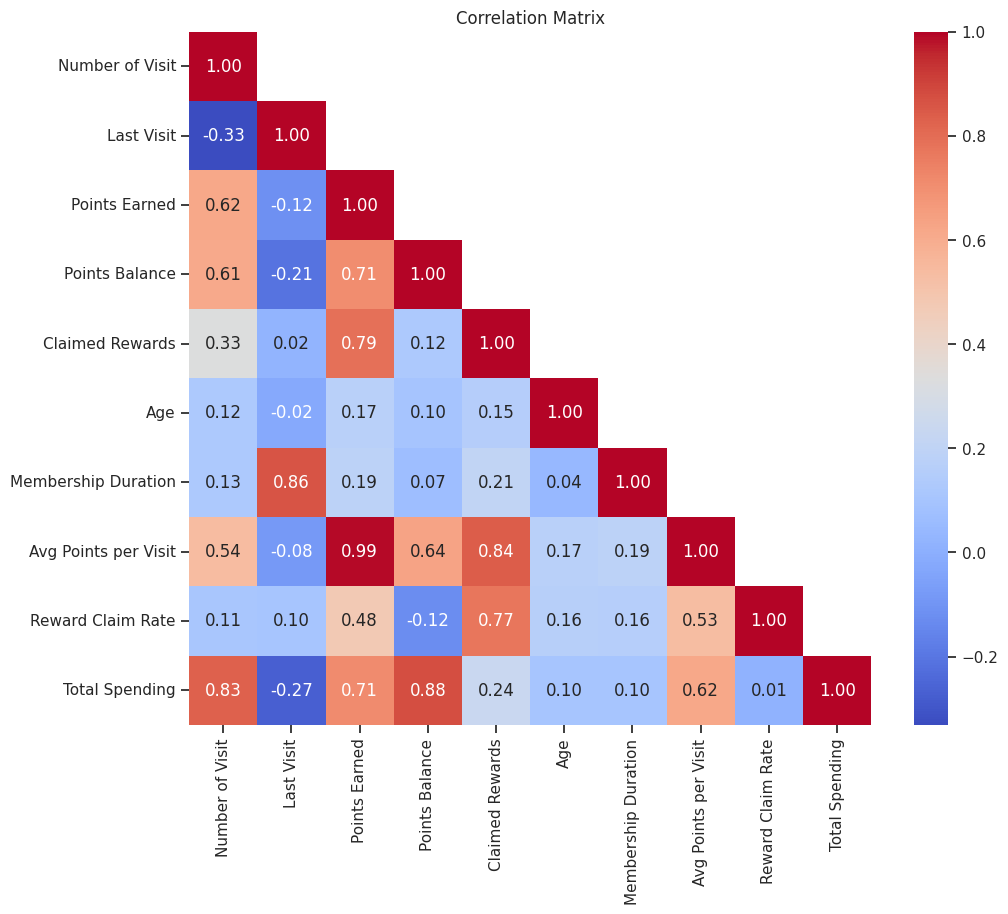

In [71]:
# Plotting correlation matrix
plt.figure(figsize=(11, 9))
mask = np.triu(np.ones_like(selected_features.corr(), dtype=bool), k=1)
sns.heatmap(selected_features.corr(), annot=True, mask=mask, cmap='coolwarm', fmt=".2f", linewidths=0)
plt.title('Correlation Matrix')
plt.show()


In [72]:
from tabulate import tabulate
selected_features.describe()
# Display summary statistics using tabulate
summary_table = selected_features.describe()
print("\nSummary Statistics of features:")
print(tabulate(summary_table, headers='keys', tablefmt='psql'))



Summary Statistics of features:
+-------+-------------------+--------------+-----------------+------------------+-------------------+-----------+-----------------------+------------------------+---------------------+------------------+
|       |   Number of Visit |   Last Visit |   Points Earned |   Points Balance |   Claimed Rewards |       Age |   Membership Duration |   Avg Points per Visit |   Reward Claim Rate |   Total Spending |
|-------+-------------------+--------------+-----------------+------------------+-------------------+-----------+-----------------------+------------------------+---------------------+------------------|
| count |        514        |   514        |       514       |        514       |        514        | 514       |            514        |              514       |          514        |        514       |
| mean  |          7.08171  |    57.9008   |         8.92607 |          2.70039 |          0.622568 |  26.249   |             57.9825   |              

In [84]:
# Calculate correlation coefficients
correlation_matrix = selected_features.corr()

# Sort correlation coefficients in descending order
sorted_correlation = correlation_matrix['Total Spending'].sort_values(ascending=False)

# Print the sorted correlation coefficients
print(f"\nCorrelation Coefficients (Descending Order):\n{sorted_correlation}")



Correlation Coefficients (Descending Order):
Total Spending          1.000000
Points Balance          0.877349
Number of Visit         0.829098
Points Earned           0.711271
Avg Points per Visit    0.618680
Claimed Rewards         0.237237
Membership Duration     0.103079
Age                     0.101842
Reward Claim Rate       0.013223
Last Visit             -0.270258
Name: Total Spending, dtype: float64


In [91]:
from tabulate import tabulate
# Calculate the 75th percentile of points earned
points_threshold = data['Points Earned'].quantile(0.75)

# Filter the dataframe based on the conditions
high_points_low_claim = data[(data['Points Earned'] > points_threshold) & (data['Reward Claim Rate'] < data['Reward Claim Rate'].mean())]

# Count the number of rows
high_points_low_claim_count = len(high_points_low_claim)

# Print the count
print("High Points Low Claim Count:", high_points_low_claim_count)

# Calculate the correlation between Points Earned and Claimed Rewards
points_rewards_corr = data['Points Earned'].corr(data['Claimed Rewards'])

# Calculate the counts of High Points Earned
high_points_earned_count = len(data[data['Points Earned'] > points_threshold])

# Calculate the average claim rate
avg_claim_rate = data['Reward Claim Rate'].mean()

# Create a table with the desired values
table = [
    ['High Points Low Claim Count', high_points_low_claim_count],
    ['Points-Rewards Correlation', points_rewards_corr],
    ['High Points Threshold', points_threshold],
    ['High Points Earned Count', high_points_earned_count],
    ['Average Claim Rate', avg_claim_rate]
]

# Display the table using tabulate
print(tabulate(table, headers=['Metric', 'Value'], tablefmt='psql'))


High Points Low Claim Count: 15
+-----------------------------+------------+
| Metric                      |      Value |
|-----------------------------+------------|
| High Points Low Claim Count |  15        |
| Points-Rewards Correlation  |   0.790069 |
| High Points Threshold       |  11        |
| High Points Earned Count    | 109        |
| Average Claim Rate          |   0.39637  |
+-----------------------------+------------+


## Member Category Analysis

In [95]:
from tabulate import tabulate

# Define the table data
table_data = [
    [0, 'Frequent', data[data['Category'] == 'Frequent']['Claimed Rewards'].mean()],
    [1, 'Infrequent', data[data['Category'] == 'Infrequent']['Claimed Rewards'].mean()],
    [2, 'Loyal', data[data['Category'] == 'Loyal']['Claimed Rewards'].mean()],
    [3, 'New', data[data['Category'] == 'New']['Claimed Rewards'].mean()]
]

# Define the table headers
headers = ['', 'Category', 'Mean Claimed Rewards']

# Display the table
print(tabulate(table_data, headers=headers, tablefmt='fancy_grid'))


╒════╤════════════╤════════════════════════╕
│    │ Category   │   Mean Claimed Rewards │
╞════╪════════════╪════════════════════════╡
│  0 │ Frequent   │              0.0666667 │
├────┼────────────┼────────────────────────┤
│  1 │ Infrequent │              0.0833333 │
├────┼────────────┼────────────────────────┤
│  2 │ Loyal      │              1.23622   │
├────┼────────────┼────────────────────────┤
│  3 │ New        │              0         │
╘════╧════════════╧════════════════════════╛


## Refactored Insight on Reward Claiming Behavior

1. **Relation Between Points Earned and Rewards Claimed**: It's important to evaluate the relationship between the points a member earns and the rewards they claim. If members are earning points but not claiming rewards, it might indicate a lack of appealing rewards or awareness. Conversely, if the earning is low, the low claiming rate could simply be due to the lack of available points to redeem.

2. **Points Balance and Claimed Rewards**: Analyzing how many members have a significant points balance but are not claiming rewards can provide insights. A high points balance with low reward claiming might suggest that members are saving points for bigger rewards, or they don't find current rewards appealing.

3. **Reward Claim Rate**: This metric, defined as the ratio of claimed rewards to points earned, gives a direct measure of how actively members are using their points to claim rewards. A low claim rate, especially among members with high points earned, could indicate a problem with the attractiveness or accessibility of rewards.

4. **Member Engagement and Category**: Understanding the behavior across different member categories (like New, Loyal, Frequent, Infrequent) can also shed light on reward claiming patterns. For instance, new members might claim fewer rewards due to unfamiliarity with the program, whereas loyal or frequent members might have different claiming patterns based on their engagement level and understanding of the reward system.

By examining these aspects, we can gain a better understanding of why rewards are claimed at the observed rate and what strategies might be effective in improving this rate. Let's conduct a more detailed analysis considering these factors.

## Analysis Findings

1. **Loyal Members**: Have the highest average claimed rewards (1.24), indicating active engagement with the rewards system.
2. **Frequent and Infrequent Members**: Show some level of engagement, albeit lower than loyal members.
3. **New Members**: Have not claimed any rewards on average, which could be due to unfamiliarity with the program or insufficient points earned to claim rewards.

**Refined Insights and Recommendations**

1. **Engaging Members with High Points Balances**: For the group with high points but no rewards claimed, understanding why they are not claiming rewards is crucial. They might be unaware of available rewards or saving points for future rewards. Communicating about available rewards or introducing more attractive options could be effective strategies.

2. **Improving Reward Claim Rate**: The overall low claim rate suggests that members might not find the rewards sufficiently appealing or may not be aware of how to claim them. Improving reward visibility and attractiveness, and educating members about the reward claiming process could enhance engagement.

3. **Targeted Strategies for Different Member Categories**:
    - **Loyal Members**: Already engaged, so focus on maintaining and enhancing their experience.
    - **New Members**: Need information and encouragement to start engaging with the rewards system. Introductory rewards or tutorials on claiming rewards could be beneficial.
    - **Frequent and Infrequent Members**: Tailored strategies based on their spending and visiting patterns can help in increasing their reward claiming rate.

By considering these factors, the loyalty program can be more effectively tailored to different member segments, potentially increasing overall engagement and satisfaction with the rewards system.

## Regression Analysis

In [96]:
# Splitting the dataset
X = selected_features.drop('Total Spending', axis=1)
y = selected_features['Total Spending']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance_sorted = feature_importance.sort_values(by='Coefficient', ascending=False)

print("Mean Squared Error:", mse)
print("R2:", r2)

print(feature_importance_sorted)

Mean Squared Error: 1.8761633299037859
R2: 0.8706880228752549
                Feature  Coefficient  Absolute Coefficient
2         Points Earned    16.871367             16.871367
3        Points Balance    13.913416             13.913416
4       Claimed Rewards    11.802712             11.802712
0       Number of Visit     2.327188              2.327188
1            Last Visit     2.000628              2.000628
8     Reward Claim Rate     0.654756              0.654756
5                   Age    -0.071060              0.071060
6   Membership Duration    -2.037816              2.037816
7  Avg Points per Visit   -30.859108             30.859108


Feature importance analysis in a Linear Regression model can be performed by examining the coefficients assigned to each feature. These coefficients indicate how much the target variable (total spending) is expected to increase or decrease when that feature increases by one unit, while other features remain constant.

Let's extract and analyze the coefficients from our Linear Regression model to understand which features have the most significant impact on predicting total spending.

The feature importance analysis from the Linear Regression model provides the following insights:

## Feature Importance Ranking

1. Points Earned: Positive impact on total spending. A higher number of points earned strongly correlates with increased spending.

2. Claimed Rewards: Has a significant negative impact. This suggests that as rewards are claimed, spending decreases, possibly indicating that members spend less once they have claimed their rewards.

3. Points Balance: The most significant positive impact on spending, which may seem counterintuitive. It could indicate that members with higher points balances are currently spending more.

4. Number of Visit: Positively impacts spending. More visits are associated with higher spending.

5. Average Points per Visit: Also a positive impact, suggesting that efficiency in earning points (more points per visit) is associated with higher spending.

6. Last Visit: The recency of the last visit positively affects spending, indicating that more recent engagement is linked to higher spending.

7. Reward Claim Rate: Has a smaller positive impact. Members who claim rewards at a higher rate tend to spend more.

8. Membership Duration: Negatively impacts spending, suggesting that newer members might spend more.

9. Age: Has the least impact, indicating that age is not a significant predictor of spending in this model.

## Insights and Recommendations

1. Focus on Points and Visits: Strategies that encourage earning more points and frequent visits can effectively increase spending.

2. Reward System Evaluation: The negative impact of claimed rewards and points balance on spending suggests a need to evaluate the reward system. It might be beneficial to offer rewards that encourage continuous engagement and spending.

3. Engage New Members: Newer members appear to spend more, so initial engagement strategies might be particularly effective.

**Caution**

The interpretation of coefficients in Linear Regression should be done cautiously, especially when features are correlated with each other. Also, the high magnitude of some coefficients suggests potential issues with the model, possibly due to multicollinearity or the scale of the features. Further investigation and possible model refinement would be advisable.

# Age group analysis
The histogram below displays the age distribution of the attendees of the event. This visualization helps in understanding the spread and concentration of different age groups among the event participants.

From the histogram, we can observe the frequency of attendees across various age ranges, providing insight into which age groups were more prevalent at the event. This information is valuable for tailoring future events and marketing strategies to better suit the predominant age demographics. ​​

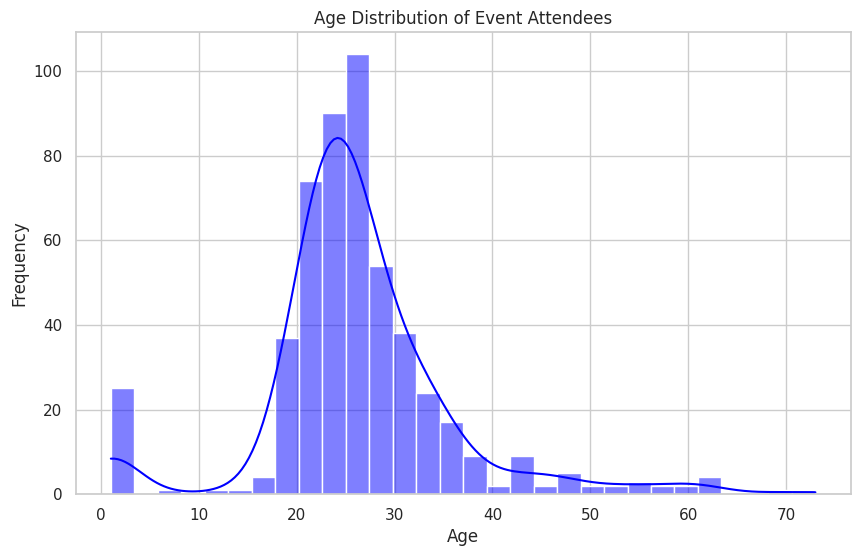

In [104]:
# Plotting the age distribution of the event attendees
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Event Attendees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


It was observed that the majority during the anniversary event falls under the Young Adults and Adults category. Let's explore their engagement with our brand and spending habits.

To conduct the analysis and provide insights on age groups in relation to an engineered feature called "engagement score", We'll first need to define what constitutes the engagement score. Considering the nature of the dataset, the engagement score could potentially be a composite metric derived from several features that indicate a customer's level of engagement, such as 'Number of Visit', 'Points Earned', 'Claimed Rewards', and others.

Once the engagement score is defined and calculated, we can then analyze it in relation to the age groups. This involves segmenting the dataset into different age groups and comparing the engagement scores across these groups to draw insights.

Let's proceed with the following steps:

1. Define and calculate the "engagement score".
2. Segment the data into different age groups.
3. Analyze the engagement score across these age groups.

The dataset includes various fields that could be relevant for calculating an engagement score. Based on the available data, I propose the following formula for the engagement score:

$
\text{{Engagement Score}} = \alpha \times \text{{Normalized Number of Visit}} + \beta \times \text{{Normalized Points Earned}} + \gamma \times \text{{Normalized Claimed Rewards}}
$

Where:
- $(\alpha, \beta, \gamma)$ are weights assigned to each component (for simplicity, we can initially set them all to 1).
- "Normalized Number of Visit", "Normalized Points Earned", and "Normalized Claimed Rewards" are the respective features normalized to a common scale (e.g., 0 to 1).

This formula aims to balance between different aspects of customer engagement, such as the frequency of visits, the points they've earned, and the rewards they've claimed.

Let's proceed to:
1. Calculate the normalized values for 'Number of Visit', 'Points Earned', and 'Claimed Rewards'.
2. Compute the engagement score
3. Segment the data into age groups
4. Analyze the engagement scores across these age groups.

The data is segmented into different age groups, defined as follows:
- Young Adults: Ages 18-25
- Adults: Ages 26-40
- Middle-aged: Ages 41-55
- Seniors: Ages 56+

We'll analyze the average engagement score in each of these age groups to identify trends and insights. Let's proceed with this segmentation and analysis.

In [102]:
# Define the weights for each component
alpha = 1
beta = 1
gamma = 1

# Normalize the values
normalized_number_of_visits = (data['Number of Visit'] - data['Number of Visit'].min()) / (data['Number of Visit'].max() - data['Number of Visit'].min())
normalized_points_earned = (data['Points Earned'] - data['Points Earned'].min()) / (data['Points Earned'].max() - data['Points Earned'].min())
normalized_claimed_rewards = (data['Claimed Rewards'] - data['Claimed Rewards'].min()) / (data['Claimed Rewards'].max() - data['Claimed Rewards'].min())

# Calculate the engagement score
engagement_score = alpha * normalized_number_of_visits + beta * normalized_points_earned + gamma * normalized_claimed_rewards

# Segment the data into age groups and calculate the average engagement score
age_groups = {
    'Young Adults': (18, 25),
    'Adults': (26, 40),
    'Middle-aged': (41, 55),
    'Seniors': (56, float('inf'))
}

# Create age group and engagement score features
data['Age Group'] = pd.cut(data['Age'], bins=[18, 25, 40, 55, float('inf')], labels=['Young Adults', 'Adults', 'Middle-aged', 'Seniors'])
data['Engagement Score'] = engagement_score

# Grouping by age group and calculating average engagement score for each group
age_group_engagement = data.groupby('Age Group')['Engagement Score'].mean().reset_index()

# Display the average engagement scores dataframe
print(age_group_engagement)


      Age Group  Engagement Score
0  Young Adults          0.225807
1        Adults          0.323227
2   Middle-aged          0.406917
3       Seniors          0.550909


/tmp/ipykernel_7583/2118491437.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_engagement = data.groupby('Age Group')['Engagement Score'].mean().reset_index()


/tmp/ipykernel_7583/1850849734.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group Range', y='Engagement Score', data=age_group_engagement, palette="mako")


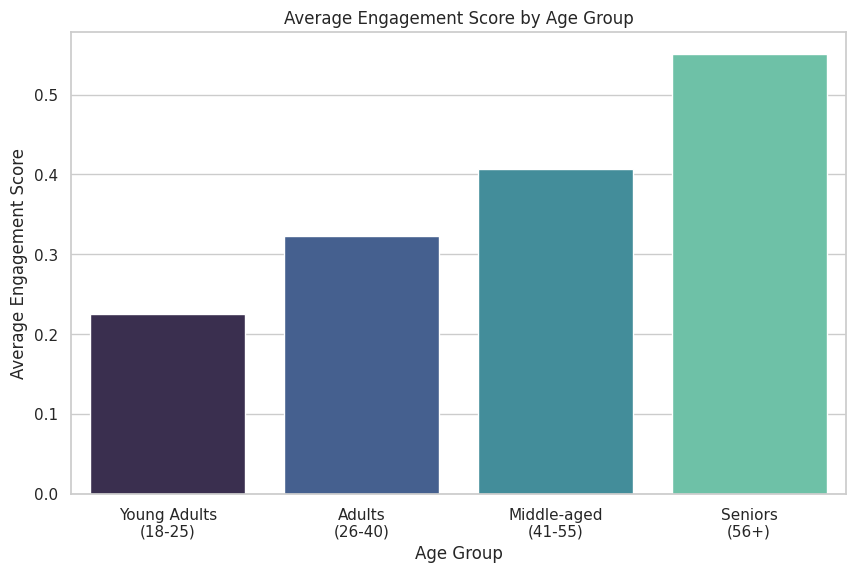

In [105]:
# Modifying the x-axis labels to include age ranges
age_group_labels = ['Young Adults\n(18-25)', 'Adults\n(26-40)', 'Middle-aged\n(41-55)', 'Seniors\n(56+)']
age_group_engagement['Age Group Range'] = age_group_labels

# Plotting again with updated labels
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group Range', y='Engagement Score', data=age_group_engagement, palette="mako")
plt.title('Average Engagement Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Engagement Score')
plt.show()


The age distribution and engagement score visuals provide several key insights:

1. Predominant Age Groups:

- The histogram shows a significant presence of Young Adults and Adults. These age groups form a substantial portion of the event's audience. This demographic is often characterized by active social life, interest in trends, and potentially higher inclination towards experiential spending.

2. Engagement vs. Spending Patterns:

- Despite the large numbers of Young Adults and Adults, their engagement scores are lower compared to seniors. Several factors could contribute to this:
    - Different Interests and Priorities: Younger audiences might be more interested in experiential or social aspects of events rather than loyalty programs or long-term engagement with a brand.
    - Loyalty Program Resonance: The structure and rewards of the loyalty program might resonate more with seniors than with younger demographics. Seniors might find more value in loyalty programs due to long-term habits, perceived benefits, or specific rewards that cater to their interests.
    - Digital Engagement: Younger demographics might engage more through digital platforms or transient promotional events, which may not be captured fully by traditional engagement scores.

3. Opportunities for Targeted Marketing:

- The large number of Young Adults and Adults presents an opportunity for targeted marketing. Understanding their preferences and tailoring marketing strategies to these groups could enhance engagement and spending.
- For instance, integrating digital and social media components into the loyalty program or event marketing could resonate more with these age groups.

4. Diversifying Product Offerings:

- A diverse audience necessitates a diverse range of products or services. Ensuring that the offerings at the event cater to a wide range of interests and needs can increase overall engagement and spending.

5. Event and Program Design:

- The design of the event and the loyalty program should consider the varying needs and preferences of different age groups. For example, interactive and tech-driven experiences might appeal more to younger attendees, while traditional and comfort-oriented experiences might be more attractive to seniors.

In summary, while Young Adults and Adults form a significant portion of the event's audience, their engagement scores are lower than those of seniors, likely due to differences in interests, priorities, and how they perceive and interact with loyalty programs. Tailoring strategies to cater to the diverse needs of these groups could lead to increased engagement and spending across all demographics.

## Engagement

The average engagement scores for each age group are as follows:

1. **Young Adults (Ages 18-25)**: 0.228
2. **Adults (Ages 26-40)**: 0.323
3. **Middle-aged (Ages 41-55)**: 0.407
4. **Seniors (Ages 56+)**: 0.551

From this analysis, we can observe the following insights:

- Increasing Engagement with Age: There is a clear trend of increasing engagement scores as age increases. Seniors have the highest average engagement score, followed by middle-aged individuals, adults, and young adults. This suggests that older customers are more engaged with the loyalty program than younger ones.

## Potential Strategies:

- For younger age groups: There might be a need for more targeted marketing or rewards that appeal specifically to younger customers to increase their engagement.
- For older age groups: The high engagement of older customers can be leveraged through tailored rewards and offers that cater to their preferences and needs.
- Further Analysis and Considerations: It's important to note that these insights are based on the engagement score formula we defined. Adjusting the weights of the components of this score or including additional factors could yield different insights. Additionally, it would be beneficial to consider other factors like customer lifetime value, frequency of purchases, and types of products purchased for a more comprehensive analysis.

This analysis provides a starting point for understanding customer engagement across different age groups and can guide targeted strategies to enhance customer loyalty and engagement.

# Spending Habit Analysis
To derive insights into the spending habits of different age groups, we need to examine the 'Total Spending' feature of the dataset in relation to the age groups. This will involve analyzing the average or median spending in each age group and exploring any patterns or trends that emerge.

We'll segment the data into the defined age groups (Young Adults, Adults, Middle-aged, Seniors) and calculate the average and median spending for each group. This approach helps in understanding not just the typical spending behavior, but also the influence of high spenders within each group.

## Mean and Median spending of Age Groups

In [107]:
# Grouping by age group and calculating average and median total spending for each group
age_group_spending = data.groupby('Age Group')['Total Spending'].agg(mean_spending=('mean'), median_spending=('median')).reset_index()

# Displaying the average and median total spending for each age group
age_group_spending


/tmp/ipykernel_7583/2418658029.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spending = data.groupby('Age Group')['Total Spending'].agg(mean_spending=('mean'), median_spending=('median')).reset_index()


,Age Group,mean_spending,median_spending
0,Young Adults,0.991837,0.0
1,Adults,2.530000,0.0
2,Middle-aged,0.782609,0.0
3,Seniors,2.700000,0.0


/tmp/ipykernel_7583/737457703.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='mean_spending', data=age_group_spending, palette="rocket")
/tmp/ipykernel_7583/737457703.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='median_spending', data=age_group_spending, palette="rocket")


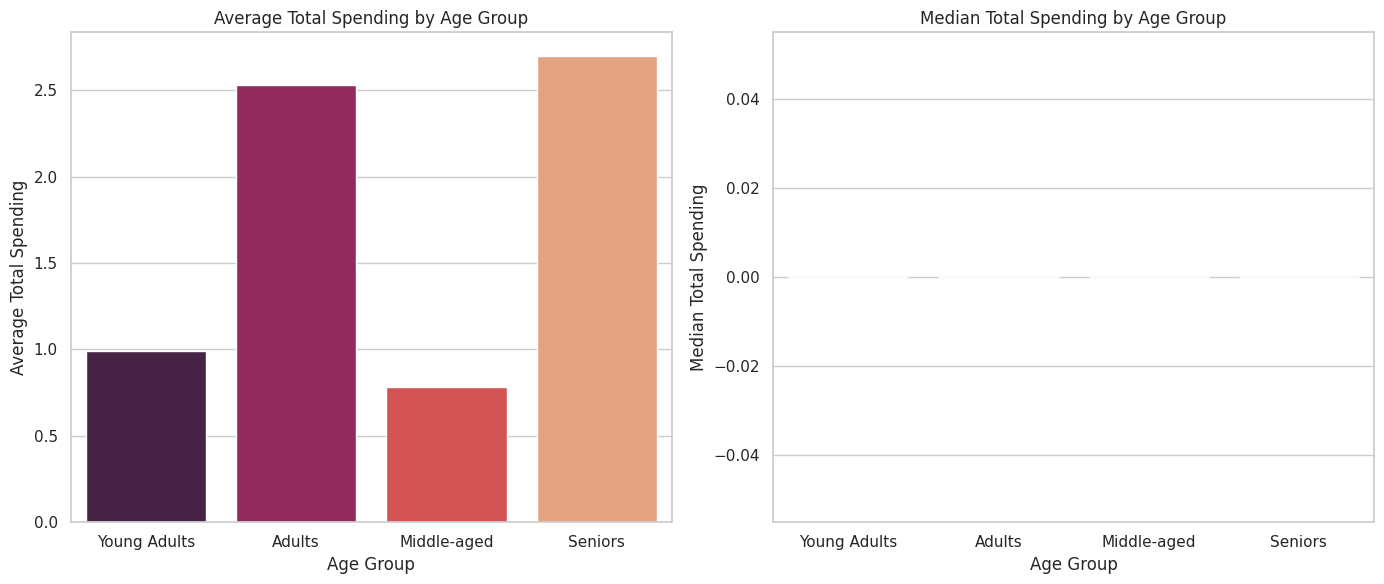

In [109]:
# Plotting the average and median total spending for each age group

plt.figure(figsize=(14, 6))

# Plot for average spending
plt.subplot(1, 2, 1)
sns.barplot(x='Age Group', y='mean_spending', data=age_group_spending, palette="rocket")
plt.title('Average Total Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Total Spending')

# Plot for median spending
plt.subplot(1, 2, 2)
sns.barplot(x='Age Group', y='median_spending', data=age_group_spending, palette="rocket")
plt.title('Median Total Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Total Spending')

plt.tight_layout()
plt.show()


## Distribution of Total Spending by Age Groups

/tmp/ipykernel_7583/532169766.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age Group', y='Total Spending', data=data, palette="Set2")


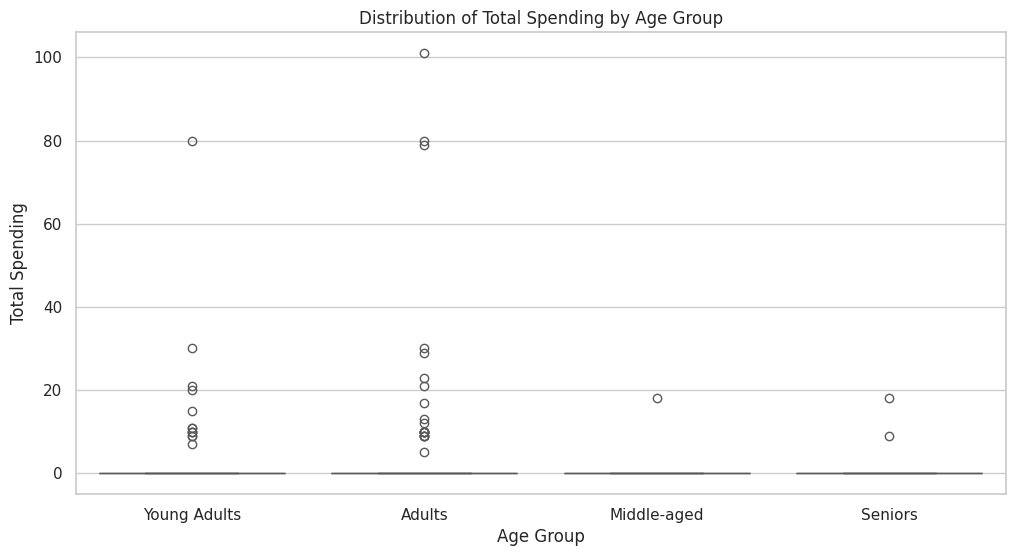

In [117]:
# Using a boxplot for a better representation of the spending statistics by age group
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age Group', y='Total Spending', data=data, palette="Set2")
plt.title('Distribution of Total Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Spending')
# plt.ylim(bottom=0)  # Set the lower limit of the y-axis to 0
plt.show()


## Data Observations
- **Age Group Distribution**: Data points are spread across all four age groups.
- **Individual Representation**: Each dot symbolizes an individual within the respective age group.
- **Data Point Concentration**: "Adults" and "Middle-aged" exhibit more data points compared to "Young Adults" and "Seniors".
- **Outliers**: Notable outliers in "Adults" and "Middle-aged" groups with elevated spending values.
- **Sample Size Variation**: "Young Adults" and "Seniors" have fewer data points, indicating a smaller sample size or less spending variation.
- **Seniors' Spending**: The "Seniors" group has minimal data points, mostly in the lower spending range.

## Total Spending Analysis by Age Group
### Young Adults (Ages 18-25)
- **Average Spending**: \$0.98
- **Median Spending**: \$0.0

### Adults (Ages 26-40)
- **Average Spending**: \$2.53
- **Median Spending**: \$0.0

### Middle-aged (Ages 41-55)
- **Average Spending**: \$0.78
- **Median Spending**: \$0.0

### Seniors (Ages 56+)
- **Average Spending**: \$2.70
- **Median Spending**: \$0.0

## Key Insights
- **Spending Disparity**: The median spending of \$0 across all age groups indicates a significant number of individuals spend very little, despite higher averages.
- **Higher Spending in Certain Groups**: Adults and seniors exhibit higher average spending, possibly due to greater disposable income or different spending priorities.
- **Marketing Strategy Implications**: These patterns can inform marketing strategies and event planning, such as targeting high spenders with personalized offers.
- **Potential in Young Adults and Middle-aged**: Opportunities may exist to increase spending in these groups through targeted promotions or tailored experiences.